# Práctica 9: Conjuntos de datos desequilibrados

Machine Learning

Universidad Iberoamericana Ciudad de México

Otoño 2023

Creado por: Luis Norberto Zúñiga Morales

## Introducción

En esta práctica vamos a trabajar con un conjunto de datos desequilibrado en un problema de clasificación binario y su efecto tanto en los modelos de aprendizaje automático y las métricas de evaluación. En esta ocasión, vamos a trabajar con el dataset de Haberman, [disponible aquí](http://archive.ics.uci.edu/dataset/43/haberman+s+survival).



*¿Qué modela este conjunto de datos?*



*¿Cuántas características tienen los datos? ¿Qué representa cada una de ellas?*

## Carga de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import recall_score, accuracy_score, f1_score, get_scorer_names, precision_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression

## Carga de datos

In [2]:
# cargar el dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
df = pd.read_csv(url, header=None, names = ['Age', 'OpYear', 'Nodes', 'Survival'])

In [3]:
df.head()

,Age,OpYear,Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
# ¿existen datos nulos?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       306 non-null    int64
 1   OpYear    306 non-null    int64
 2   Nodes     306 non-null    int64
 3   Survival  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


## Análisis básico de los datos

In [15]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (6,4)

[Text(0, 0, '225'), Text(0, 0, '81')]

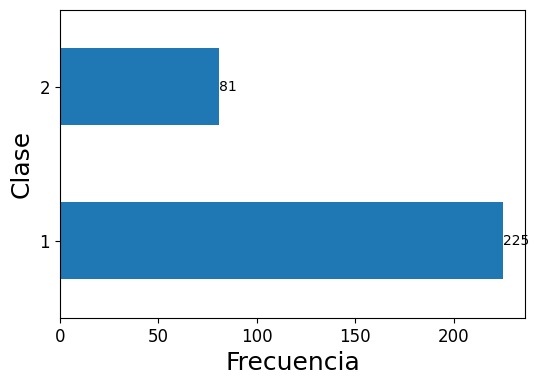

In [16]:
ax = df['Survival'].value_counts().plot(kind='barh', rot=0, fontsize='12')
# sort_index()
ax.set_xlabel("Frecuencia", fontsize=18)
ax.set_ylabel("Clase", fontsize=18)
ax.bar_label(ax.containers[0])

*¿Creen que este desbalance en la distribución de los datos ocasione algún problema con nuestros modelos de clasificación?*

## Partición de los datos

In [17]:
# definir X y y
X = df.drop(columns = ['Survival'])
y = df.iloc[:,-1]

In [18]:
# train - test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

## Entrenamiento del modelo con validación cruzada

In [19]:
# definimos nuestro modelo de clasificación
clf = LogisticRegression()

En esta ocasión, vamos a utilizar validación cruzada para evaluar el desempeño de nuestro modelo mediante las implementaciones que tiene scikit-learn. En este caso, vamos a utilizar el método `cross_validate`, el cual nos permite especificar diversas métricas de evaluación y regresa un diccionario con otros resultados interesantes. Esta forma no es la única disponible en la librería, también existe `cross_val_score`, `cross_val_predict`, `KFold` y `RepeatedKFold`. Para saber más, [consultar este enlace](https://scikit-learn.org/stable/modules/cross_validation.html).

Para especificar las métricas para evaluación, necesitamos especificarlas en una lista con sus nombres. Para identificar esos nombres, vamos a usar la función `get_scorer_names()`:

In [20]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [21]:
# metricas para evaluar
scoring = ['accuracy', 'recall', 'precision','f1']

Definimos nuestro modelo con validación cruzada. Para saber más sobre los parámetros que usamos, revisar su documentación [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate).

In [22]:
scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv = 10, return_estimator=True)

¿Qué contiene la variable `scores`?

In [23]:
sorted(scores.keys())

['estimator',
 'fit_time',
 'score_time',
 'test_accuracy',
 'test_f1',
 'test_precision',
 'test_recall']

¿Qué sucede si accedemos al valor de cada llave en el diccionario? Tenemos los resultados de evaluación en cada pliegue.

In [25]:
for i in sorted(scores.keys()):
  print(f'{i}: {scores[i]}')
  print('--------------------')

estimator: [LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression()]
--------------------
fit_time: [0.02305436 0.00588036 0.00723577 0.00709009 0.00764966 0.01460505
 0.00559688 0.00569701 0.01099157 0.00788593]
--------------------
score_time: [0.00788927 0.00695705 0.00724244 0.00876927 0.01562834 0.00912023
 0.00742245 0.0068984  0.00722098 0.00767732]
--------------------
test_accuracy: [0.84615385 0.88461538 0.76923077 0.69230769 0.76923077 0.73076923
 0.84615385 0.73076923 0.73076923 0.69230769]
--------------------
test_f1: [0.9047619  0.93023256 0.86363636 0.81818182 0.86363636 0.84444444
 0.9047619  0.8372093  0.8372093  0.80952381]
--------------------
test_precision: [0.86363636 0.86956522 0.76       0.72       0.76       0.73076923
 0.82608696 0.75       0.75       0.73913043]
--------------------
test_recall: [0

En sí, lo que se calcula en estos casos es una media y media de dispersión de los resultados de evaluación:

In [27]:
for i in sorted(scores.keys()):
  try:
    print(f'{i} ---> media:{np.mean(scores[i])}, desv. est.: {np.std(scores[i])}')
  except:
    pass

fit_time ---> media:0.0095686674118042, desv. est.: 0.005212697402873073
score_time ---> media:0.008482575416564941, desv. est.: 0.002482768672730966
test_accuracy ---> media:0.7692307692307693, desv. est.: 0.06435846357954428
test_f1 ---> media:0.8613597771737307, desv. est.: 0.03811199029859658
test_precision ---> media:0.7769188203101247, desv. est.: 0.052287694888378075
test_recall ---> media:0.9686842105263158, desv. est.: 0.03476175342794207


Al momento de entrenar y evaluar los modelos con validación cruzada, le pedimos al método regresar los estimadores entrenados con la opción `return_estimator = True`. Vamos a usar cada uno de ellos para evaluarlo con los datos de prueba y obtener una media de rendimiento:

In [28]:
acc_test = []
f1_test = []
rec_test = []
prec_test = []
for i in range(len(scores['estimator'])):
  y_pred = scores['estimator'][i].predict(X_test)
  acc_test.append(accuracy_score(y_test, y_pred))
  f1_test.append(f1_score(y_test, y_pred))
  rec_test.append(recall_score(y_test, y_pred))
  prec_test.append(precision_score(y_test, y_pred))

In [29]:
print(f'f1_test ---------> media: {np.mean(f1_test)} , desv. est.: {np.std(f1_test)}')
print(f'accuracy_test:---> media: {np.mean(acc_test)} , desv. est.: {np.std(acc_test)}')
print(f'recall_test: ----> media: {np.mean(rec_test)} , desv. est.: {np.std(rec_test)}')
print(f'precision_test: -> media: {np.mean(prec_test)} , desv. est.: {np.std(prec_test)}')

f1_test ---------> media: 0.7891521658644945 , desv. est.: 0.005368382080710776
accuracy_test:---> media: 0.6630434782608695 , desv. est.: 0.010869565217391297
recall_test: ----> media: 0.8787878787878787 , desv. est.: 1.1102230246251565e-16
precision_test: -> media: 0.7161585365853658 , desv. est.: 0.008841463414634154


*Comparen los resultados de entrenamiento y prueba. ¿Qué pueden observar?*

Finalmente, vamos a graficar la matriz de confusión que se genera al hacer las predicciones con el conjunto de entrenamiento.

In [ ]:
for i in range(len(scores['estimator'])):
  y_pred = scores['estimator'][i].predict(X_test)
  cm = confusion_matrix(y_test, y_pred, labels=scores['estimator'][i].classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=scores['estimator'][i].classes_)
  disp.plot()

*¿Qué logran apreciar en las matrices de confusión?*

## Actividades

1. Realizar todo el procesos de clasificación y evaluación con validación cruzada usando K-Vecinos Más Cercanos y MVS. Reportar las matrices de confusión correspondientes. ¿Mejora en algo?